<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Classifica%C3%A7%C3%A3o_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
teste = pd.read_csv('/content/test.csv')

In [3]:
treino = pd.read_csv('/content/train.csv')

In [4]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Primeiro faço as analises1 com treino pq é mais convecional

In [6]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Sempre devemos fazer a remoção de dados duplicados antes de qualquer coisa, pois se fizermos posteriormente pode-se acabar criando linhas duplicadas que anteriormente não eram. Por exemplo, pode ser que duas pessoas tivessem as mesmas caraterísticas, só sendo diferenciados pelo nome e id e quando removermos o id e o nome possa ser que o computador entenda que são linhas duplicadas.

In [7]:
treino = treino.drop_duplicates()
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


Os valores nulos da idade e Embarked podem ser preenchidos com valores da moda

O inplace ele vai modificar permanentemente o dataset

In [8]:
treino['Age'].fillna(treino['Age'].mode()[0], inplace=True)

In [9]:
treino['Embarked'].fillna(treino['Embarked'].mode()[0], inplace=True)

Remover dados  duplicados, pois quando é duplicado significa que toda linha é igual

Como os valores da coluna Cabin são muitos valores nulos, vou retirar essa coluna. De todo modo, cabine é apenas pra identificação, não é uma variável que se constroi algo, não influencia em nada

In [10]:
treino.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], inplace=True)

Irei verificar quantos tipos existem em cada varivável categórica

In [11]:
treino['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
treino['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Existem dois tipos de modelos de categorização (que é transformar string em um tipo numérico).

1- onehotencoder a codificação one-hot é usada para converter variáveis ​​categóricas em um formato que pode ser facilmente usado por algoritmos de aprendizado de máquina .

A ideia básica da codificação one-hot é criar novas variáveis ​​que assumem os valores 0 e 1 para representar os valores categóricos originais.

Por exemplo, a imagem a seguir mostra como executaríamos codificação one-hot para converter uma variável categórica que contém nomes de equipe em novas variáveis ​​que contêm apenas valores 0 e 1:

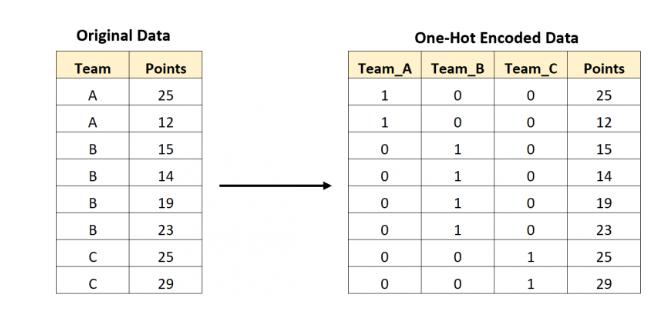


2- labelencoder é usado quando existem uma ordem entre as categorias. Ele transforma cada elemento da coluna em valores numeros de relevância.

Usando onehotencoder em ambas as colunas

Etapa 2: executar a codificação One-Hot
Em seguida, vamos importar a função OneHotEncoder() da biblioteca sklearn e usá-la para executar a codificação one-hot na variável 'team' no pandas DataFrame:

In [13]:
from sklearn.preprocessing import OneHotEncoder

#creando um objeto do tipo one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#Está aplicando one-hot encoding nas colunas 'Sex', 'Embarked' 
encoder_treino = pd.DataFrame(encoder.fit_transform(treino[['Sex', 'Embarked']]).toarray())

# juntando as novas colunas numéricas criadas com o dataframe original
final_treino = treino.join(encoder_treino)

#ver resultado final do dataset treino
display(final_treino)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,3,4
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0.0,1.0,0.0,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,1.0,0.0,0.0,0.0,1.0
888,0,3,female,24.0,1,2,23.4500,S,1.0,0.0,0.0,0.0,1.0
889,1,1,male,26.0,0,0,30.0000,C,0.0,1.0,1.0,0.0,0.0


Etapa 3: Elimine a variável categórica original
Por fim, podemos descartar a variável 'Sex','Embarked', original do DataFrame, pois não precisamos mais dela:



In [14]:
 final_treino.drop(columns=['Sex','Embarked'], axis= 1 , inplace= True)

In [15]:
final_treino.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,0,1,2,3,4
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


Também poderíamos renomear as colunas do DataFrame final para facilitar a leitura:

In [16]:
final_treino.columns = ['Survived',	'Pclass',	'Age','SibSp', 'Parch',	'Fare','Male', 'Female', 'Cherbourg', 'Queenstown', 'Southampton'] 

In [17]:
final_treino.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


Precisamos separar as variáveis target (y) das preditoras (x)

In [18]:
y = final_treino['Survived']

x = final_treino.drop('Survived', axis=1)

In [19]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [20]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Verificando a presença de outliers pra ver se existe alguma linha a ser removida ou também ver qual tipo de escalonamento deve ser utilizado. Os dois principais são:

1- MinMaxScaler, que transforma os dados entre 0 e 1. É mais usado para datasets com pouco outliers;

2- StandardScaler, é usado quando não há intervalos definidos. É uma boa técnica quando se tem muitos outliers.

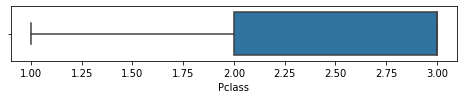

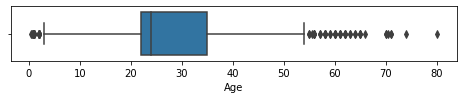

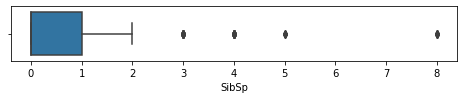

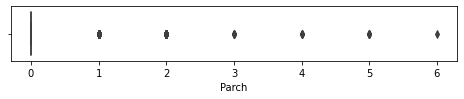

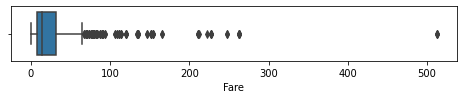

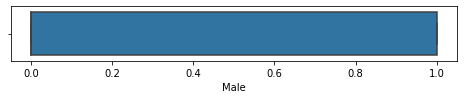

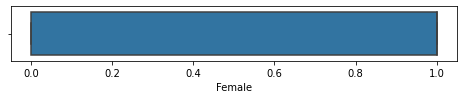

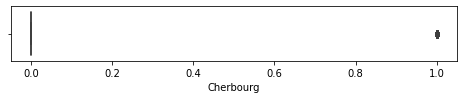

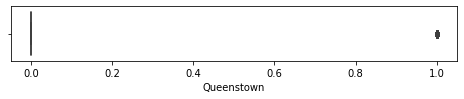

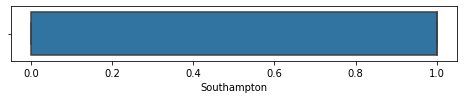

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in x:
        plt.figure(figsize=(8,1))
        sns.boxplot(data=x, x=column)

Vericando que se têm muitos outliers, não queremos remover pois são passageiros relevantes. Apenas aplicar o escalonamento adequado pra aproveitar esses dados. Esse escalonamento é feito com as variáveis preditivas então vamos pegar o dataset de x

In [22]:
from sklearn.preprocessing import StandardScaler
 
 #instaciando
std_scaler = StandardScaler()
 
 #aplicando transformação
treino_scaled = std_scaler.fit_transform(x.to_numpy())
treino_scaled = pd.DataFrame(treino_scaled, columns= [
    'Pclass',	'Age','SibSp', 'Parch',	'Fare','Male', 
    'Female', 'Cherbourg', 'Queenstown', 'Southampton'
])
  
treino_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,0.827377,-0.497793,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.715048,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.194583,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.487640,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.487640,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838


OBSERVE QUE O DATASET DE TREINO AINDA NÃO FOI TREINADO APENAS FOI ORGANIZADO OS DADOS PRA DEPOIS TREINAR

In [23]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


.reset_index() pq quando excluo os valores duplicados, os indices excluidos permanecem na mesma posição. Para evitar isso precisamos resetar os indices, porém quando resetamos aparece uma coluna chamada "index" no dataset, precisamos excluir ela.

In [24]:
teste = teste.drop_duplicates()
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [25]:
teste.drop(columns=["Cabin", "Ticket", "Name", "PassengerId"], inplace=True)

In [26]:
teste['Age'].fillna(teste['Age'].mode()[0], inplace=True)


In [27]:
teste['Embarked'].fillna(teste['Embarked'].mode()[0], inplace=True)

.reset_index() pq quando excluo os valores duplicados, os indices excluidos permanecem na mesma posição. Para evitar isso precisamos resetar os indices, porém quando resetamos aparece uma coluna chamada "index" no dataset, precisamos excluir ela.

Excluindo coluna index

Observe que Fare tem uma linha nula, preciso preenchê-la

In [28]:
display(teste)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,21.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,21.0,0,0,8.0500,S


In [29]:
media = teste['Fare'].mean()

In [30]:
teste['Fare'].fillna(value=media, inplace=True)


In [31]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [32]:
teste['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [33]:

teste['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [34]:
from sklearn.preprocessing import OneHotEncoder

#creando um objeto do tipo one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#Está aplicando one-hot encoding nas colunas 'Sex', 'Embarked' 
encoder_teste = pd.DataFrame(encoder.fit_transform(teste[['Sex', 'Embarked']]).toarray())

# juntando as novas colunas numéricas criadas com o dataframe original
final_teste = teste.join(encoder_teste)

#ver resultado final do dataset treino
display(final_teste)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2,3,4
0,3,male,34.5,0,0,7.8292,Q,0.0,1.0,0.0,1.0,0.0
1,3,female,47.0,1,0,7.0000,S,1.0,0.0,0.0,0.0,1.0
2,2,male,62.0,0,0,9.6875,Q,0.0,1.0,0.0,1.0,0.0
3,3,male,27.0,0,0,8.6625,S,0.0,1.0,0.0,0.0,1.0
4,3,female,22.0,1,1,12.2875,S,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,21.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0
414,1,female,39.0,0,0,108.9000,C,1.0,0.0,1.0,0.0,0.0
415,3,male,38.5,0,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
416,3,male,21.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0


PRECISO DEIXAR O DATASET DE TESTE NO MESMO FORMATO DO DE TREINO PRA PODER APLICAR O MÉTODO DE CLASSIFICAÇÃO.SENDO QUE NO DATASET DE TESTE NÃO TEM O 'Y' QUE É O SUVIVER

In [35]:
final_teste.drop(columns=['Sex','Embarked'], axis= 1 , inplace= True)

final_teste.head()

final_teste.columns = ['Pclass',	'Age','SibSp', 'Parch',	'Fare',
                       'Male', 'Female', 'Cherbourg', 'Queenstown', 'Southampton'] 

final_teste.head()



x_teste = final_teste

x_teste.head()



,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0


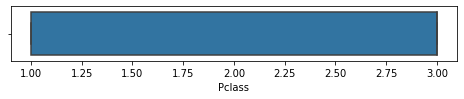

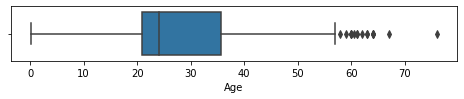

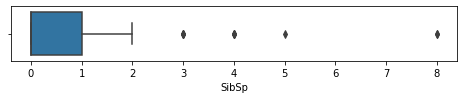

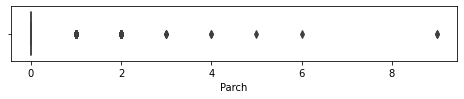

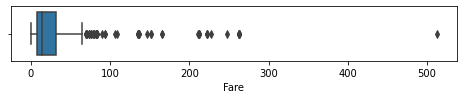

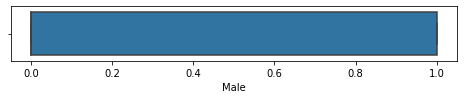

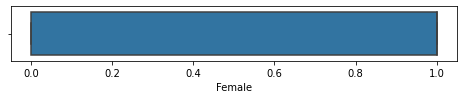

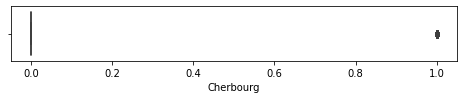

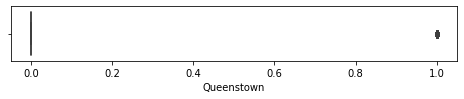

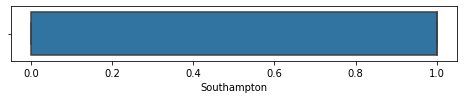

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in x_teste:
        plt.figure(figsize=(8,1))
        sns.boxplot(data=x_teste, x=column)

In [37]:
from sklearn.preprocessing import StandardScaler
 
 #instaciando
std_scaler = StandardScaler()
 
 #aplicando transformação
teste_scaled = std_scaler.fit_transform(x_teste.to_numpy())
teste_scaled = pd.DataFrame(teste_scaled, columns= [
    'Pclass',	'Age','SibSp', 'Parch',	'Fare','Male', 
    'Female', 'Cherbourg', 'Queenstown', 'Southampton'
])
  
teste_scaled.head()

,Pclass,Age,SibSp,Parch,Fare,Male,Female,Cherbourg,Queenstown,Southampton
0,0.873482,0.466044,-0.499470,-0.400248,-0.498407,-0.755929,0.755929,-0.568142,2.843757,-1.350676
1,0.873482,1.415579,0.616992,-0.400248,-0.513274,1.322876,-1.322876,-0.568142,-0.351647,0.740370
2,-0.315819,2.555021,-0.499470,-0.400248,-0.465088,-0.755929,0.755929,-0.568142,2.843757,-1.350676
3,0.873482,-0.103676,-0.499470,-0.400248,-0.483466,-0.755929,0.755929,-0.568142,-0.351647,0.740370
4,0.873482,-0.483490,0.616992,0.619896,-0.418471,1.322876,-1.322876,-0.568142,-0.351647,0.740370


 vamos testar os modelos de classificação, os mais usados são:

1- Árvore de Decisão/Floresta Aleatória 2- K-Nearest Neighbors (KNN) 3- Análise Discriminante Linear 4- Regressão logística 5- Naive Bayes 6- Support Vector Machines (SVMs) 7- CatBoost

# APLICANDO Regressão Logística pra verificar se é o modelo mais indicado pra essa situação

In [38]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split não vou precisar usar pq dataset já está separado
from sklearn.metrics import confusion_matrix, accuracy_score

Antes de aplicar o modelo é necessario veirificar se a variável target está balanceada.

In [39]:
treino.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Aqui percebemos que os dados 0 e 1 estão em uma proporção proxima, logo não precisa balancear

Instanciar Logistic Regression

O x de treino ficou como treino_scaled pq foi feito escalonamento e o y premanceu pq não foi necessário fazer o escalonamento

In [40]:
lr = LogisticRegression()

lr.fit(treino_scaled,y)

LogisticRegression()

Lembrando que o .fit é apenas usado para treino

Agora vamos fazer o predict pra predizer os valores de teste. Lembrando que nesse dataset não temos a variável target pq queremos predizer ela.

In [41]:
y_pred= lr.predict(teste_scaled)

passando y_pred para dataframe

In [42]:
y_pred = pd.DataFrame(y_pred)

In [43]:
display(y_pred)

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


Renomeando a coluna

In [44]:
# rename columns
y_pred = y_pred.rename(columns={0: 'Survived'})

In [45]:
y_pred

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


Fazer um join com o dataset teste que foi feito as modificações: preenchido valores nulos, removido duplicados

Vamos gerar novamente o dataset teste original para que possamos dar o join do y_pred com o dataset de teste para obter o id do cliente relacionado ao index.

In [46]:
teste_2 = pd.read_csv('/content/test.csv')

In [47]:
teste_2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Vamos agora remover todas as colunas com exceção do PassengerId, para fazer o join com y_pred e deixar a submissão do modo que o Kaggle pediu. Com o Id e sua predição se sobreviveu ou não

In [48]:
teste_2 = teste_2.drop(['Pclass',	'Name',	'Sex',	'Age',	'SibSp',	'Parch',	'Ticket',	'Fare',	'Cabin',	'Embarked'], axis=1)

Faremos agora o merge dos dataframes através do index.

In [49]:
submissao_kaggle = pd.merge(teste_2, y_pred, left_index=True, right_index=True)
submissao_kaggle

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
submissao_kaggle.to_csv('submissao_titanic.csv',index=False)

Como não temos o valor reais da coluna survived, não temos como saber as métricas antes de submeter no Kaggle, por isso não faremos essa parte do processo. Logo não sabemos se o modelo foi eficiente ou não.

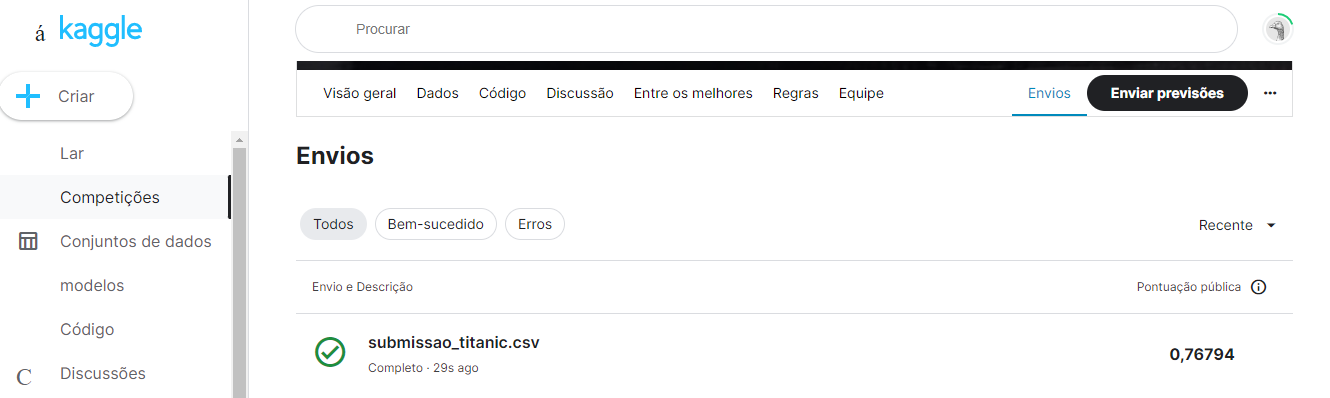